<a href="https://colab.research.google.com/github/atmasuko/Intro-ao-Python/blob/main/Trabalho_Pr%C3%A1tico_Parte_1_Grupo_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final


Neste trabalho final, **André Masuko** e **Gustavo Baroni** se debruçam em analisar a base de dados [Airline-Sentiment](https://data.world/crowdflower/airline-twitter-sentiment). Essa base é formada pela coleção de tweets em relação a companhias aéreas dos EUA, incluindo uma análise do teor desses.

# Conhecendo a base

##Importando e conhecendo a estrutura

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gbam-ds/FinalProject_IntroPython/main/Airline-Sentiment-2-w-AA.csv'
airline = pd.read_csv(url,index_col=0,parse_dates=[0], encoding = "ISO-8859-1")
airline.head() 

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
_unit_id,,,,,,,,,,,,,,,,,,,
681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [2]:
#qtd de observações totais e únicas
airline.shape

(14640, 19)

In [3]:
#conhecendo as variáveis
airline.dtypes

_golden                            bool
_unit_state                      object
_trusted_judgments                int64
_last_judgment_at                object
airline_sentiment                object
airline_sentiment:confidence    float64
negativereason                   object
negativereason:confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_id                        float64
tweet_location                   object
user_timezone                    object
dtype: object

In [4]:
#nulo
print(airline.isnull().sum().sort_values(ascending = False))

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason:confidence        4118
_last_judgment_at                  56
airline_sentiment:confidence        0
airline_sentiment                   0
airline                             0
_unit_state                         0
name                                0
retweet_count                       0
text                                0
_trusted_judgments                  0
tweet_created                       0
tweet_id                            0
_golden                             0
dtype: int64


In [5]:
#duplicado
airline[airline.duplicated()]

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
_unit_id,,,,,,,,,,,,,,,,,,,


Verifica-se, portanto, que não há linhas duplicadas.

##Entendendo os sentimentos gerais da base

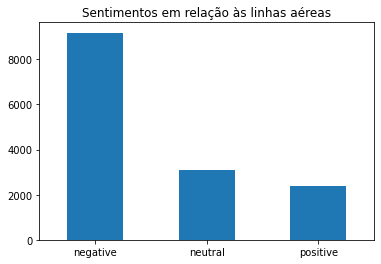

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb1492fae10>,
 (array([0, 1, 2]), <a list of 3 Text major ticklabel objects>),
 Text(0.5, 1.0, 'Sentimentos em relação às linhas aéreas'),
 None)

In [6]:
import matplotlib.pyplot as plt

cont = airline['airline_sentiment'].value_counts()
cont.plot(kind='bar'), plt.xticks(rotation = 360), plt.title('Sentimentos em relação às linhas aéreas'), plt.show()

##Visualizando as principais palavras

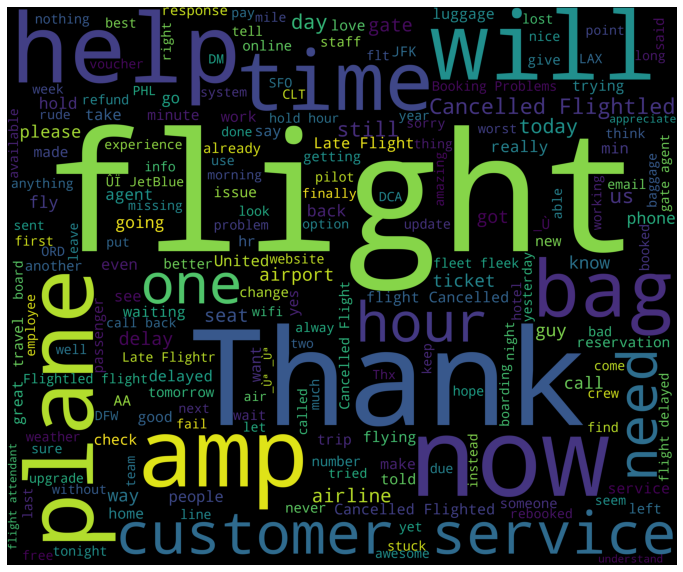

In [7]:
#principais palavras
from wordcloud import WordCloud,STOPWORDS

words = ' '.join(airline['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Vemos que, entre as mais frequentes, há palavras relacionadas com o tema de voo, como Flight, Plane e Bag. Além disso, já temos indícios de sentimento com Thank, Help, Customer e Service.

##Confiança dos sentimentos gerais da base

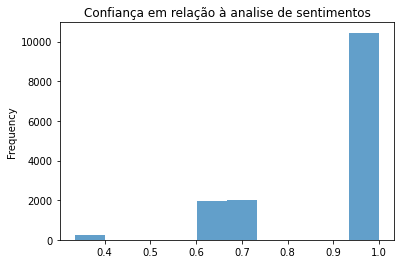

(Text(0.5, 1.0, 'Confiança em relação à analise de sentimentos'), None)

In [8]:
airline['airline_sentiment:confidence'].plot.hist(alpha=0.7);
plt.title('Confiança em relação à analise de sentimentos'), plt.show()

##Razões gerais de queixa

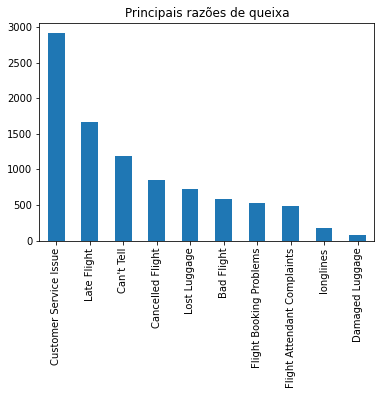

(Text(0.5, 1.0, 'Principais razões de queixa'), None)

In [9]:
cont = airline['negativereason'].value_counts()
cont.plot(kind='bar')
plt.title('Principais razões de queixa'), plt.show()


##Origem dos tweets

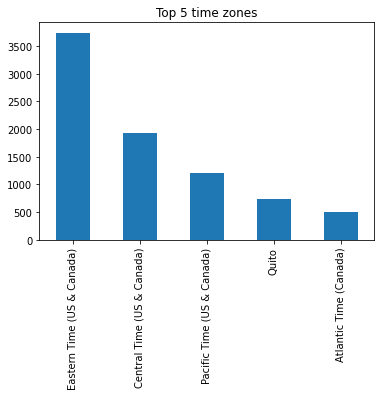

(Text(0.5, 1.0, 'Top 5 time zones'), None)

In [10]:
#usamos timezone pq apresenta mais dados doq outras variaveis de regiao
cont = airline['user_timezone'].value_counts()[:5]
cont.plot(kind='bar')
plt.title('Top 5 time zones'), plt.show()

##Entendendo os sentimentos por companhia

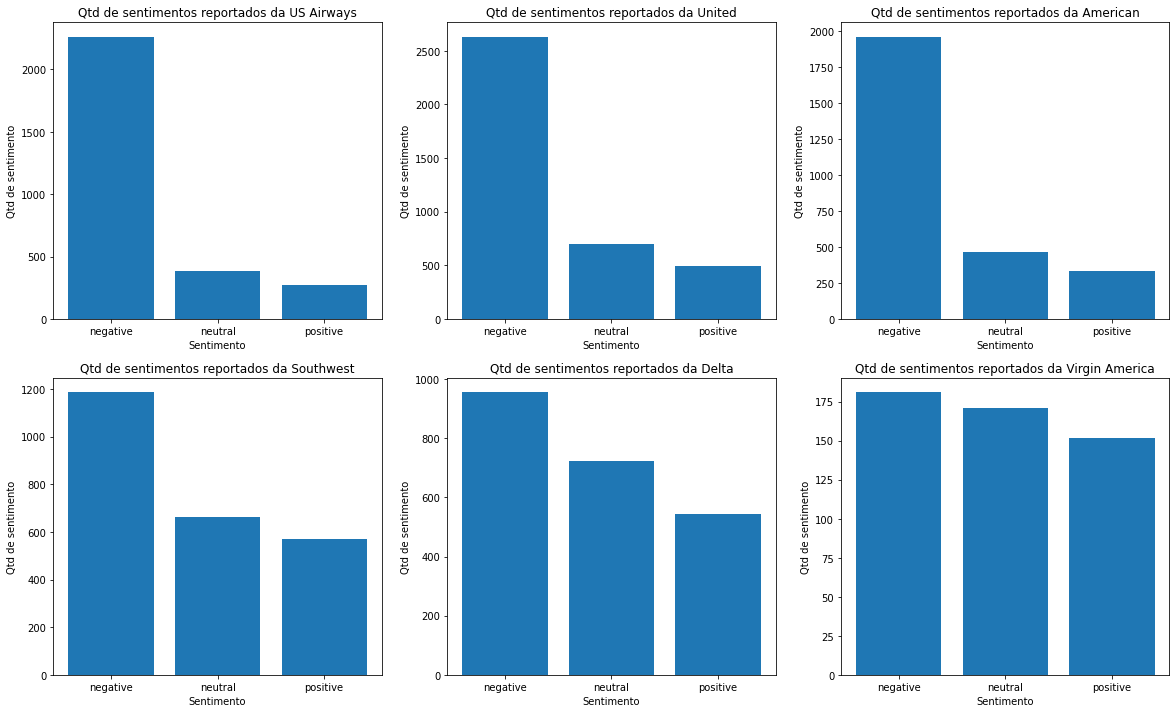

In [11]:
def plot_sub_sentiment(Airline):
    df=airline[airline['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Qtd de sentimento')
    plt.xlabel('Sentimento')
    plt.title('Qtd de sentimentos reportados da '+Airline)

plt.figure(1,figsize=(20, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

##Entendendo as razões de queixa por companhia

NB: durante a realização desta análise, percebemos que o agrupamento de todas as companhias prejudicaria a visualização. Decidimos, portanto, dividir o plot em duas fases, como verá a seguir.

In [12]:
#quantificando as queixas para cada companhia

qtd_negative=dict(airline['negativereason'].value_counts(sort=False))
def qtd_negative(Airline):
    if Airline=='All':
        df=airline
    else:
        df=airline[airline['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(airline['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [13]:
#definindo o plot

def plot_reason(Airline):
    df = qtd_negative(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Qtd de queixa')
    plt.xlabel('Queixa')
    plt.title('Fontes de queixa da '+Airline)

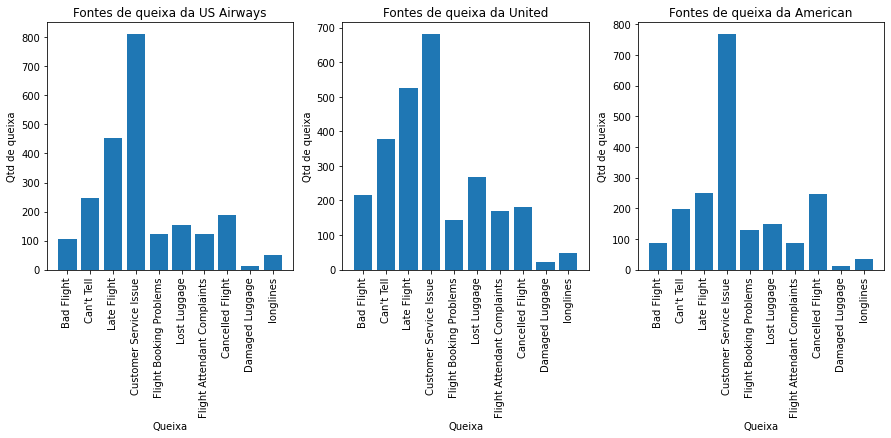

In [14]:
#plotando 1o grupo
plt.figure(1,figsize=(15, 10))
plt.subplot(231)
plot_reason('US Airways')
plt.subplot(232)
plot_reason('United')
plt.subplot(233)
plot_reason('American')


Customer Service é o principal problema para as empresas do 1o grupo, implicando em necessidade de revisão da atuação com a área de Consumer Experience. Um fator que consideramos interessante é que a terceira razão de queixa para a United, ao contrário das demais, é a Lost Luggage, implicando em necessidade de revisão da atuação com a área de Operações.

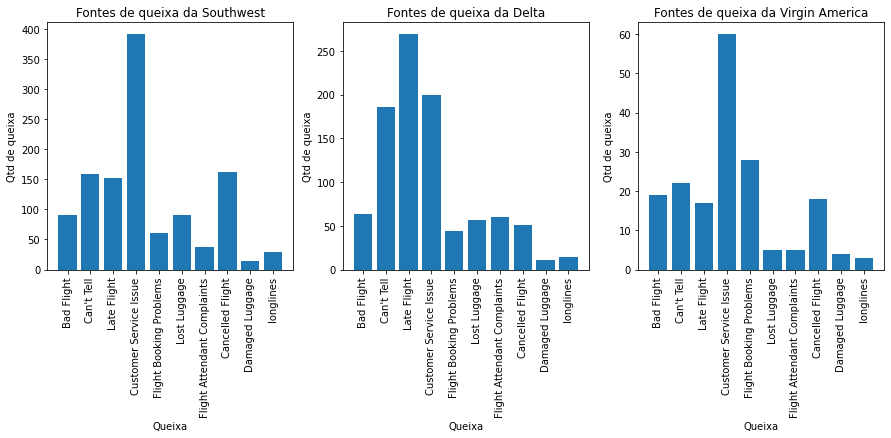

In [15]:
#plotando 2o grupo
plt.figure(1,figsize=(15, 10))
plt.subplot(234)
plot_reason('Southwest')
plt.subplot(235)
plot_reason('Delta')
plt.subplot(236)
plot_reason('Virgin America')

Ao contrário do 1o grupo, no 2o, Customer Service não é consensualmente o maior problema. No entanto, para Delta, o maior problema é Late Flight. Além disso, destaca-se que Cancelled Flight e Flight Booking são o segundo maior problema de Southwest e Virgin America, respectivamente.

#Sentimento e retweet

Posts com teor negativo são, em geral, mais retweetados do que posts com teor positivo?

Será verdade que indivíduos tendem a se mobilizar mais quando estão perdendo do que quando estão se beneficiando de algo?

In [ ]:
# Queremos analisar se tweets com teor negativo são mais compartilhados, em geral
negative = airline[(airline.airline_sentiment == "negative")]
y = negative["retweet_count"].mean()
print("A média de retweets para cada tweet negativo é:", y)

A média de retweets para cada tweet negativo é: 0.09337546306384834


In [ ]:
positive = airline[(airline.airline_sentiment == "positive")]
x = positive["retweet_count"].mean()
print("A média de retweets para cada tweet positivo é:", x)


A média de retweets para cada tweet positivo é: 0.06940330088870081


In [ ]:
data = {'Tipo': ['Positivo', 'Negativo'],
        'Média de Retweets': [x, y]}
data = pd.DataFrame(data)
data        

,Tipo,Média de Retweets
0,Positivo,0.069403
1,Negativo,0.093375


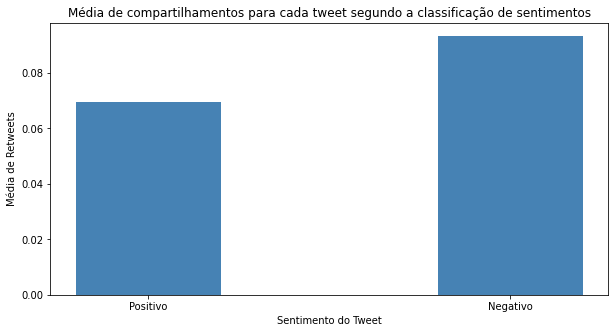

In [ ]:
data = {'Positivo':x, 'Negativo':y}
retweets = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# criando o bar plot
plt.bar(retweets, values, color ='steelblue',
        width = 0.4)
 
plt.xlabel("Sentimento do Tweet")
plt.ylabel("Média de Retweets")
plt.title("Média de compartilhamentos para cada tweet segundo a classificação de sentimentos")
plt.show()

A análise feita acima permite observar que os tweets classificados como "negativos" são, em média, mais compartilhados do que os tweets com teor de conteúdo considerado "positivo". Isso corrobora a hipótese segundo a qual usuários, em geral, possuem mais propensidade a se mobilizarem quando estão perdendo ou sendo prejudicados do que quando estão ganhando ou se beneficiando de algum fator.

#Análise de Sentimentos

Decidimos usar o modelo de análise de texto como sentimento visto em sala de aula para comparar com a categorização feita pela própria base de dados.

In [ ]:
from textblob import TextBlob,Word

def polarity(x):
  try:
      return TextBlob(x).sentiment[0]
  except:
        return 9

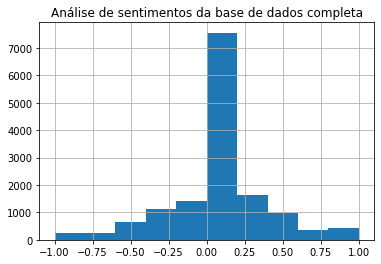

A média da análise de sentimentos é: 0.048857191173908146


In [ ]:
sentiments = airline["text"].apply(lambda x: polarity(x))
sentiments.hist();
plt.title('Análise de sentimentos da base de dados completa'), plt.show()
import statistics
x = statistics.mean(sentiments)
print("A média da análise de sentimentos é:", x)

Vemos que, na média, o modelo rotula que os tweets foram neutros (0.04). No entanto, é difícil de dizer se tem mais textos neutros ou positivos. Acreditamos que essa dificuldade se dá, sobretudo, em razão da alta quantidade de colunas do histograma.

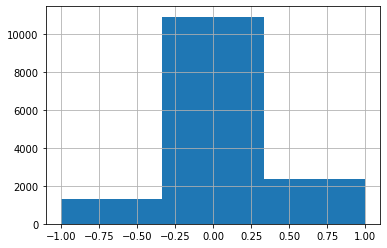

In [ ]:
#forçando analise em negativo, neutro e positivo
sentiments = airline["text"].apply(lambda x: polarity(x))
sentiments.hist(bins=3);

Com essa visualização, é mais fácil de perceber que o modelo rotula mais tweets como neutros. Ademais, vimos que os resultados diferem: há mais neutros e positivos na classifição do modelo do que na base de dados original.

A classificação original é mais condizente na nossa opinião porque, como discutido em aula, acreditamos que pessoas que se manifestam publicamente (no Twitter) tendem a fazer isso para expressar insatisfação e não um elogio à companhia aérea.

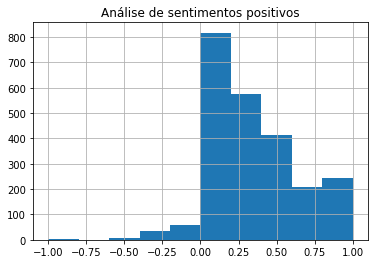

A média da análise de sentimentos positivos é: 0.3314143141299683


In [ ]:
# testando a robustez e eficiência do algoritmo de análise de sentimentos
import matplotlib.pyplot as plt
# filtrando somente os tweets originalmente considerados positivos
positive = airline[(airline.airline_sentiment == "positive")]

# aplicando a análise de sentimentos
sentiments = positive["text"].apply(lambda x: polarity(x))
sentiments.hist();
plt.title('Análise de sentimentos positivos'), plt.show()

import statistics
x = statistics.mean(sentiments)
print("A média da análise de sentimentos positivos é:", x)

A maior parte da distribuição está concentrada na direita.

O gráfico acima, portanto, permite identificar que a maior parte dos tweets classificados originamente como positivos também tende a ser considerada positiva pela análise de sentimentos. No entanto, existem casos de divergência, que serão analisados em seguida.



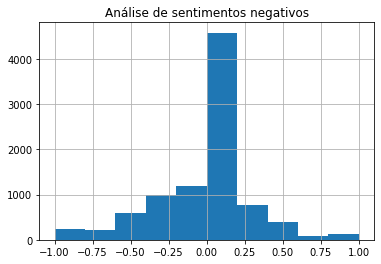

A média da análise de sentimentos negativos é: -0.03572761606203103


In [ ]:
# testando a robustez e eficiência do algoritmo

# filtrando somente os tweets originalmente considerados negativos
negative = airline[(airline.airline_sentiment == "negative")]

# aplicando a análise de sentimentos
sentiments = negative["text"].apply(lambda x: polarity(x))
sentiments.hist();
plt.title('Análise de sentimentos negativos'), plt.show()
import statistics
x = statistics.mean(sentiments)
print("A média da análise de sentimentos negativos é:", x)

# eficiência aparentemente menor se comparada aos sentimentos positivos

A média aritmética para os tweets negativos é menor do que zero. Isso indica que, na média, tweets originalmente classificados como negativos também foram considerados negativos pela nossa análise de sentimentos.

No entanto, o histograma acima evidencia que alguns valores estão acima de 0.5 e portanto seriam considerados "positivos" pela nossa análise de sentimentos, o que contradiz a classificação original ("negativa").

#Entendendo divergências

Para tentar entender por que isso aconteceu, primeiro vamos filtrar os tweets originalmente classificados como positivos mas que tiveram valor negativo em nossa análise de sentimentos.

De forma análoga, faremos uma segunda análise na qual filtraremos os tweets originalmente classificados como negativos mas que tiveram valor positivo em nossa análise de sentimentos.

###Positive

In [ ]:
# filtrando somente tweets classificados como positivos
positive = airline[(airline.airline_sentiment == "positive")]

# efetuando a análise de sentimentos
sentiments = positive["text"].apply(lambda x: polarity(x))

# concatenando a análise de sentimentos com a base de dados original
df = pd.merge(positive, sentiments, on = '_unit_id')

# renomeando a coluna de sentimentos e texto para evitar confusão
df = df.rename(columns={'text_y': 'sentiment', 'text_x': 'text'})

# filtrando tweets com análise de sentimentos negativa
filtered = df[df['sentiment'] < 0]
data = filtered[["text", "airline_sentiment", "sentiment"]]
data

,text,airline_sentiment,sentiment
_unit_id,,,
681448404,@VirginAmerica come back to #PHL already. We n...,positive,-0.533333
681448621,@VirginAmerica twitter team. you guys killed i...,positive,-0.250000
681448793,@VirginAmerica I mean. Probably inappropriate ...,positive,-0.390625
681448851,@VirginAmerica of course! I work for @VirginAt...,positive,-0.250000
681448921,"@VirginAmerica , am I dreaming? Did you really...",positive,-0.028125
...,...,...,...
681678730,@AmericanAir Eventually the call got through. ...,positive,-0.312500
681679120,@AmericanAir Shout-out to all the ground crews...,positive,-0.172222
681679495,@AmericanAir flights have been on time Late Fl...,positive,-0.375000



Repare que no tweet "ID 681448621" (segunda linha da tabela acima), o usuário escreveu a palavra "killed", o que gerou uma ambiguidade.

Essa palavra pode ser interpretada de diferentes modos a depender do contexto.

Que pode ser positivo, exemplo: "you guys killed it!";("vocês arrasaram!")

Ou negativo. Exemplo: "You killed my plans!"; ("vocês destruíram meus planos!")

Provavelmente, esta ambiguidade semântica causou divergências entre a classificação original da base e aquela feita pelo algoritmo.

Além disso, note que o tweet ID 681679688 (penúltima linha da tabela acima) apresenta a junção de palavras positivas com negativas ("mad" - que significa "raivoso, enfurecido", com a palavra "love", que é "amor" em português.)

Ao que tudo indica, a mescla entre palavras de conotação positiva e negativa em uma mesma sentença (neste caso, "mad love"), provavelmente causou a divergência entre a classificação original do sentimento e a análise feita pelo algoritmo.

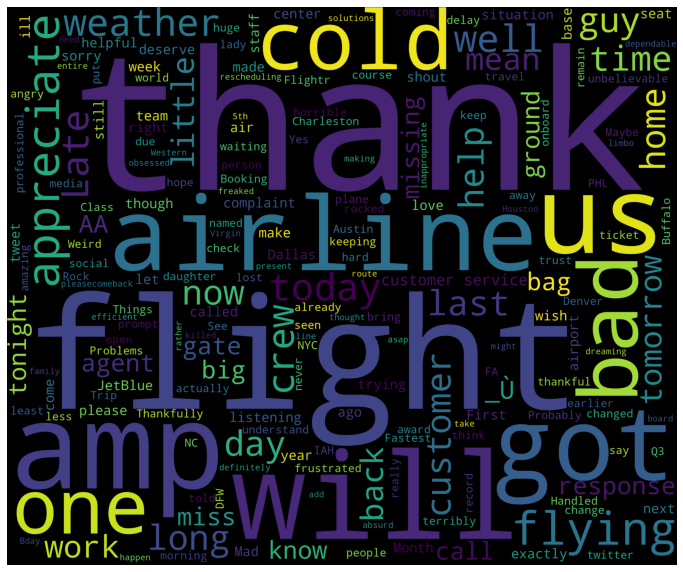

In [ ]:
#plotando a divergência
from wordcloud import WordCloud,STOPWORDS

words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Como visto no wordcloud, embora existam palavras de cunho virtualmente negativo, como Bad, a maioria, de fato, representa um sentimento positivo, como Thank e Appreciate. Isso indica que a classificação da base foi melhor do que a do modelo.

###Negative

In [ ]:
# filtrando os tweets classificados como negativos
negative = airline[(airline.airline_sentiment == "negative")]

# aplicando a análise de sentimentos
sentiments = negative["text"].apply(lambda x: polarity(x))

# concatenando a análise de sentimentos com a base original
df = pd.merge(negative, sentiments, on = '_unit_id')

# renomeando a coluna de sentimentos e texto para evitar confusão
df = df.rename(columns={'text_y': 'sentiment', 'text_x': 'text'})

# agora vamos ver quais tweets foram originalmente classificados como negativos mas nosso algoritmo considera-os como positivos

# Aqui, partimos de pressuposto que os tweets maiores ou iguais a 0.5 são positivos

# filtrando os tweets com análise de sentimentos maior do que 0.5
filt = df[df['sentiment'] > 0.5]
data = filt[["text", "airline_sentiment", "sentiment"]]
data

,text,airline_sentiment,sentiment
_unit_id,,,
681448387,@VirginAmerica called your service line and wa...,negative,1.000000
681448774,@VirginAmerica husband and I ordered three dri...,negative,1.000000
681449024,@United the internet is a great thing. I am e...,negative,0.800000
681449085,"@united I just sent an email to Customer Care,...",negative,0.781250
681449259,"@united yes, but still now answers. Many have ...",negative,0.976562
...,...,...,...
681679714,@AmericanAir fix the engine of flight AA3031so...,negative,0.800000
681679722,@AmericanAir All flts to JFK Cancelled Flightl...,negative,1.000000
681679725,@AmericanAir i was also told by agents my issu...,negative,0.813802


Repare que o tweet de ID 681449259 (quinta linha da tabela acima) possui a seguinte sentença: " yes, but still now answers."

Aparentemente, o próprio usuário cometeu um typo ao publicar o seu tweet. O usuário, nesse sentido, acabou escrevendo "now" ao invés de "no answers" ("sem respostas", em português), o que sinaliza uma reclamação direcionada à companhia aérea.

Ao que tudo indica, isso fez com que o algoritmo retornasse um valor positivo, ainda que a frase possua, originalmente, uma conotação negativa.

Portanto, podemos dizer que eventuais typos tendem a interferir na eficiência da análise de sentimentos.

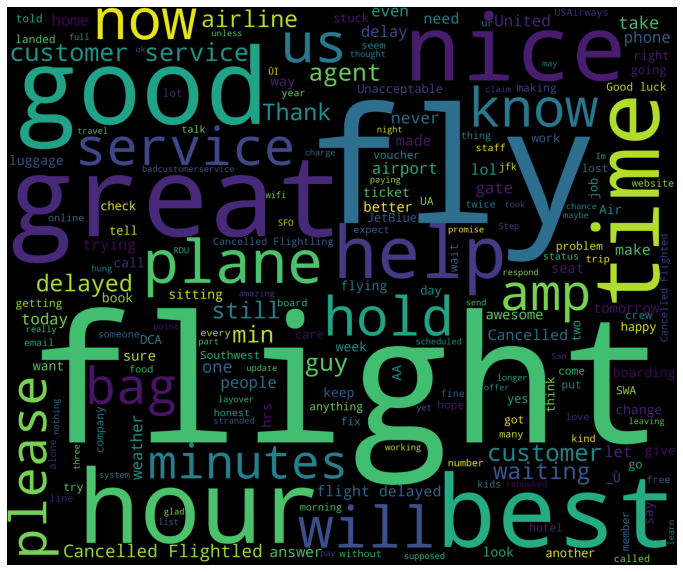

In [ ]:
#plotando a divergência
from wordcloud import WordCloud,STOPWORDS

words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

No entanto, aqui, percebemos que há mais palavras virtualmente positivas, como Please, Great, Nice, Best e Good. Nesse sentido, sem ler os tweets individualmente e analisando de modo geral com as palavras mais usadas, entendemos que o modelo performou melhor ao classificar como positivas.

#Conclusão

De forma geral, concluímos que as empresas de companhia aérea sofrem com a experiência do cliente e com questões operacionais. Ademais, entendemos que a base original possui uma classificação eficiente para palavras positivas, mas é menos eficaz do que o modelo para classificar palavras negativas.